In [2]:
import glob

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import numpy as np
import time
import visa
from scipy.optimize import curve_fit

In [5]:
cd ..

/Users/APR1/Google Drive/COLUMBIA/S6/InterLab/radiometer


In [94]:
date = "2016-11-18"
t = ""
files = glob.glob("Data/"+date+"_"+t+"*.txt")
print(files)

['Data/2016-11-18_14:39:10_Readout.txt', 'Data/2016-11-18_14:41:54_Readout.txt', 'Data/2016-11-18_14:43:40_Readout.txt', 'Data/2016-11-18_14:45:45_Readout.txt', 'Data/2016-11-18_14:47:29_Readout.txt', 'Data/2016-11-18_14:48:48_Readout.txt', 'Data/2016-11-18_14:51:28_Readout.txt', 'Data/2016-11-18_14:53:24_Readout.txt', 'Data/2016-11-18_14:56:37_Readout.txt', 'Data/2016-11-18_14:59:01_Readout.txt', 'Data/2016-11-18_15:01:03_Readout.txt', 'Data/2016-11-18_15:02:32_Readout.txt', 'Data/2016-11-18_15:04:02_Readout.txt', 'Data/2016-11-18_15:05:25_Readout.txt', 'Data/2016-11-18_15:06:46_Readout.txt', 'Data/2016-11-18_15:08:22_Readout.txt', 'Data/2016-11-18_15:10:12_Readout.txt', 'Data/2016-11-18_15:11:39_Readout.txt', 'Data/2016-11-18_15:13:36_Readout.txt', 'Data/2016-11-18_15:16:00_Readout.txt', 'Data/2016-11-18_15:17:31_Readout.txt', 'Data/2016-11-18_15:19:16_Readout.txt', 'Data/2016-11-18_15:20:39_Readout.txt', 'Data/2016-11-18_15:23:25_Readout.txt', 'Data/2016-11-18_15:25:09_Readout.txt',

In [96]:
# read header
headers = []
for f in files[8:24]:
    with open(f,"r") as file: 
        header = []
        for line in file:
            if line.startswith("#"):
                header.append(line[2:])
        headers.append(header)
print(headers)

[['./Data/2016-11-18_14:56:37_Readout.txt\n', 'Duration (in s): 60\n', 'Pointing Position of the Horn: Sky\n', 'Angle pointing (from horizontal perpendicular to supporting axis): 90\n', 'Angle pointing (from horizontal parallel to supporting axis): 20\n', 'Calibrator used: NO\n', 'Temperature Outside (in celcius): 16.5\n', 'Temperature of the calibrator (in celcius): \n', 'Weather: very clear\n'], ['./Data/2016-11-18_14:59:01_Readout.txt\n', 'Duration (in s): 60\n', 'Pointing Position of the Horn: Sky\n', 'Angle pointing (from horizontal perpendicular to supporting axis): 90\n', 'Angle pointing (from horizontal parallel to supporting axis): 25\n', 'Calibrator used: NO\n', 'Temperature Outside (in celcius): 16.5\n', 'Temperature of the calibrator (in celcius): \n', 'Weather: very clear\n'], ['./Data/2016-11-18_15:01:03_Readout.txt\n', 'Duration (in s): 60\n', 'Pointing Position of the Horn: Sky\n', 'Angle pointing (from horizontal perpendicular to supporting axis): 90\n', 'Angle pointin

In [97]:
# select files with no callibrator
unCalFiles = []
angleDicFiles = dict()
for h in headers:
    calLine = h[5].strip('\n')
    #print(calLine)
    if 'NO' in calLine.split(': ')[1]:
        #print(1)
        unCalFiles.append(h[0].strip('\n'))
        angle = h[4].strip('\n').split(': ')[1]
        #print(angle)
        if len(angle)==2: 
            if angle not in angleDicFiles:
                angleDicFiles[angle]=[h[0].strip('\n')]
            else:
                angleDicFiles[angle].append(h[0].strip('\n'))
print(angleDicFiles.keys())
print(angleDicFiles)

dict_keys(['25', '35', '75', '45', '65', '20', '85', '80', '90', '60', '40', '70', '30', '50', '55'])
{'25': ['./Data/2016-11-18_14:59:01_Readout.txt'], '35': ['./Data/2016-11-18_15:02:32_Readout.txt'], '75': ['./Data/2016-11-18_15:16:00_Readout.txt'], '45': ['./Data/2016-11-18_15:05:25_Readout.txt'], '65': ['./Data/2016-11-18_15:11:39_Readout.txt'], '20': ['./Data/2016-11-18_14:56:37_Readout.txt'], '85': ['./Data/2016-11-18_15:19:16_Readout.txt'], '80': ['./Data/2016-11-18_15:17:31_Readout.txt'], '90': ['./Data/2016-11-18_15:20:39_Readout.txt', './Data/2016-11-18_15:23:25_Readout.txt'], '60': ['./Data/2016-11-18_15:10:12_Readout.txt'], '40': ['./Data/2016-11-18_15:04:02_Readout.txt'], '70': ['./Data/2016-11-18_15:13:36_Readout.txt'], '30': ['./Data/2016-11-18_15:01:03_Readout.txt'], '50': ['./Data/2016-11-18_15:06:46_Readout.txt'], '55': ['./Data/2016-11-18_15:08:22_Readout.txt']}


In [98]:
angles = np.linspace(20,90,(90-20)/5+1)
from random import randint
colors = dict()
for i in range(len(angles)):
    colors[str(int(angles[i]))]='%06X' % randint(0, 0xFFFFFF)
print(angles)
print(colors)

[ 20.  25.  30.  35.  40.  45.  50.  55.  60.  65.  70.  75.  80.  85.  90.]
{'25': 'E86D17', '35': '417AF8', '75': '9CE9A2', '45': 'A98C47', '65': '5B511F', '20': 'D05B43', '85': '5C884A', '80': '6E033D', '90': '450A3B', '60': 'CE942F', '40': '23C091', '70': '6D4126', '30': '9B6AEA', '50': '7373D5', '55': 'DFB3A0'}


[0.85455991631799155, 0.8390081512605041, 0.83028041841004174, 0.82391998327759197, 0.81794460251046031, 0.8140476987447699, 0.81133193629505451, 0.80878625314333608, 0.80681917922948077, 0.80576783919597994, 0.80378199329983246, 0.80388533109807214, 0.80340787269681746, 0.80255358045492842, 0.80216974278128683]


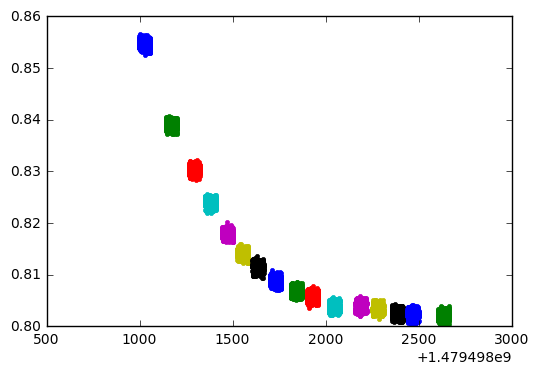

In [101]:
meanPowers = []
meanPower = []
for angle in angles:
    files = angleDicFiles[str(int(angle))]
    means = []
    for f in files:
        data=np.loadtxt(f)
        plt.plot(data[:,0],-data[:,1], '.')
        #plt.color = (colors[str(int(angle))])
        grid()
        means.append(np.mean(-data[:,1]))
    #print(means)
    meanPowers.append(means)   
    meanPower.append(np.mean(means))
print(meanPower)

In [124]:
#G=0.000118338559546
#Trec=847.568934377
G = 0.00113299392409
Trec=-91.8693275607
meanTemp = [x/G - Trec for x in meanPower]
print(meanTemp)

[846.11866477966032, 832.39240841868434, 824.68916070932676, 819.07533084032877, 813.80135660261953, 810.36188205396274, 807.96490322471027, 805.71803932050784, 803.98186592007664, 803.05393505377015, 801.30119317764536, 801.39240090263172, 800.97098787375069, 800.21697479060435, 799.87819303239689]


P(theta) =0.799624303275/(cos(0.27102074883 *(90-theta)))


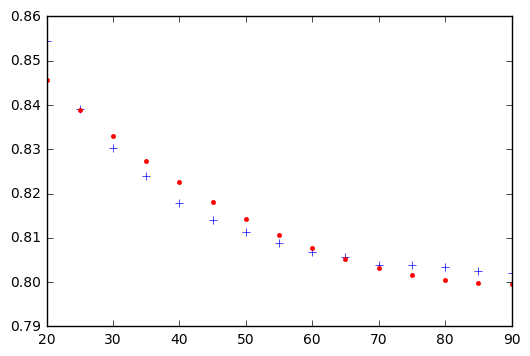

In [131]:
from scipy.optimize import curve_fit 

# choose the function to be fitted... 
def secant (x,a,b):
    return a/cos(b*(90-x)*2*pi/360)

# exectute the curve fit...
coeffs, fiterr = curve_fit(secant, angles, meanPower)

# ...and plot the results
print ("P(theta) =%s/(cos(%s *(90-theta)))" % (coeffs[0],coeffs[1]))
plt.plot(angles,meanPower , '+')
plt.plot(angles,secant(angles,*coeffs),'r.')
plt.show()

a=488.708611504


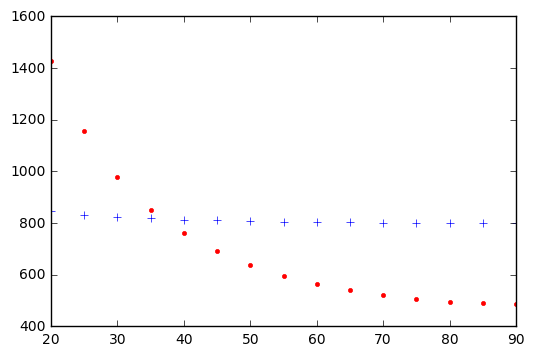

In [126]:
# exectute the curve fit...
tempCoeffs, tempFiterr = curve_fit(secant, angles, meanTemp)

# ...and plot the results
print ("a=%s" % (tempCoeffs[0]))
plt.plot(angles,meanTemp , '+')
plt.plot(angles,secant(angles,*tempCoeffs),'r.')
plt.show()